<a href="https://colab.research.google.com/github/Cansuuzum-38/Comparative-ML-and-TransferLearning-using-Fruit-Dataset/blob/main/Fruits_Dataset_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kaggle kütüphanesini yükle
!pip install -q kaggle

In [2]:
# Kaggle API anahtarını yüklemek için
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cansuzm","key":"f524ddd4c9527f39ec453e01f1f14792"}'}

In [3]:
# Doğru dizine taşı ve izin ver
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Veri setini indir
!kaggle datasets download -d shreyapmaher/fruits-dataset-images

Dataset URL: https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images
License(s): other


In [5]:
# Zip dosyasını çıkart
import zipfile
with zipfile.ZipFile("fruits-dataset-images.zip", 'r') as zip_ref:
    zip_ref.extractall("fruits_dataset")


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2  # %20 validation
)

# Eğitim verisi
train_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Doğrulama verisi
val_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


# **TRANSFER LERANING(MOBILENET)**

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Pre-trained katmanları dondur
for layer in base_model.layers:
    layer.trainable = False

# Derle ve eğit
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, validation_data=val_gen, epochs=10)



<ipython-input-9-afa5bd8dc31a>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_157']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2646 - loss: 2.1771 - val_accuracy: 0.7606 - val_loss: 0.7922
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7603 - loss: 0.6640 - val_accuracy: 0.8310 - val_loss: 0.4642
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8909 - loss: 0.3617 - val_accuracy: 0.8732 - val_loss: 0.4068
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9239 - loss: 0.2392 - val_accuracy: 0.9014 - val_loss: 0.2876
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9394 - loss: 0.1789 - val_accuracy: 0.8732 - val_loss: 0.2873
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9563 - loss: 0.1365 - val_accuracy: 0.8592 - val_loss: 0.3202
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9883 - loss: 0.0967 - val_accuracy: 0.9155 - val_loss: 0.3149
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9499 - loss: 0.1253 - val_accuracy: 0.8873 - val_loss: 0.2855
Epoch 9/10
9/9 ━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_157']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step

=== 📄 Classification Report ===
                  precision    recall  f1-score   support

     apple fruit       1.00      0.62      0.77         8
    banana fruit       1.00      1.00      1.00         8
    cherry fruit       0.88      0.88      0.88         8
   chickoo fruit       0.75      0.75      0.75         8
    grapes fruit       0.78      0.88      0.82         8
      kiwi fruit       1.00      1.00      1.00         8
     mango fruit       0.70      1.00      0.82         7
    orange fruit       0.88      0.88      0.88         8
strawberry fruit       1.00      0.88      0.93         8

        accuracy                           0.87        71
       macro avg       0.89      0.88      0.87        71
    weighted avg       0.89      0.87      0.87        71



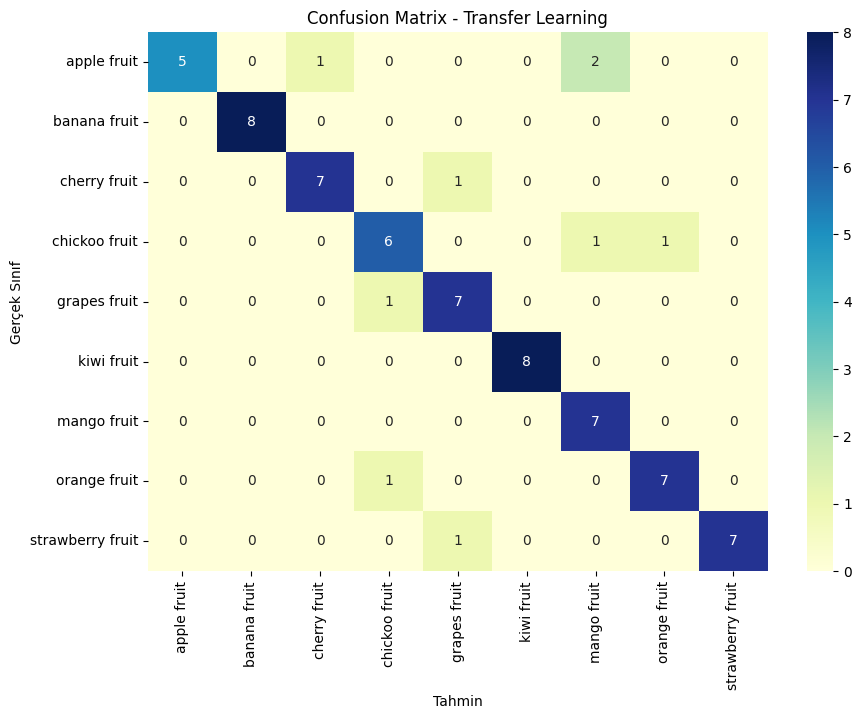


📊 Transfer Learning (MobileNetV2) Metrikleri:
Accuracy: 0.8732
Log Loss: 0.3255
ROC AUC Score: 0.9951
Matthews Correlation Coefficient (MCC): 0.8594


In [10]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, matthews_corrcoef, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

val_gen.reset()
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

y_pred_prob = model.predict(val_gen, verbose=1)
y_pred = np.argmax(y_pred_prob, axis=1)

# Log Loss
loss = log_loss(y_true, y_pred_prob)

# ROC AUC (çoklu sınıf)
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
roc_auc = roc_auc_score(y_true_bin, y_pred_prob, average='macro', multi_class='ovr')

# Diğer metrikler
acc = accuracy_score(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)

print("\n=== 📄 Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="YlGnBu")
plt.title("Confusion Matrix - Transfer Learning")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Sınıf")
plt.show()

print("\n📊 Transfer Learning (MobileNetV2) Metrikleri:")
print(f"Accuracy: {acc:.4f}")
print(f"Log Loss: {loss:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


# **VGG16**

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input

vgg_base = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

vgg_model = Model(inputs=vgg_base.input, outputs=output)

for layer in vgg_base.layers:
    layer.trainable = False

vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.fit(train_gen, validation_data=val_gen, epochs=10)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_314']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.1501 - loss: 2.2932 - val_accuracy: 0.2394 - val_loss: 2.0441
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3671 - loss: 1.9711 - val_accuracy: 0.4507 - val_loss: 1.8633
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5018 - loss: 1.8034 - val_accuracy: 0.5915 - val_loss: 1.6897
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5646 - loss: 1.6355 - val_accuracy: 0.5634 - val_loss: 1.5454
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6241 - loss: 1.4352 - val_accuracy: 0.6479 - val_loss: 1.4359
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6313 - loss: 1.3421 - val_accuracy: 0.6761 - val_loss: 1.2888
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6540 - loss: 1.2334 - val_accuracy: 0.6338 - val_loss: 1.2369
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7075 - loss: 1.1692 - val_accuracy: 0.7324 - val_loss: 1.1495
Epoch 9/10
9/9 ━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_314']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)



=== 📄 VGG16 Classification Report ===
                  precision    recall  f1-score   support

     apple fruit       0.71      0.62      0.67         8
    banana fruit       1.00      0.88      0.93         8
    cherry fruit       0.55      0.75      0.63         8
   chickoo fruit       0.50      0.50      0.50         8
    grapes fruit       0.73      1.00      0.84         8
      kiwi fruit       0.80      0.50      0.62         8
     mango fruit       0.83      0.71      0.77         7
    orange fruit       0.67      0.75      0.71         8
strawberry fruit       0.71      0.62      0.67         8

        accuracy                           0.70        71
       macro avg       0.72      0.70      0.70        71
    weighted avg       0.72      0.70      0.70        71



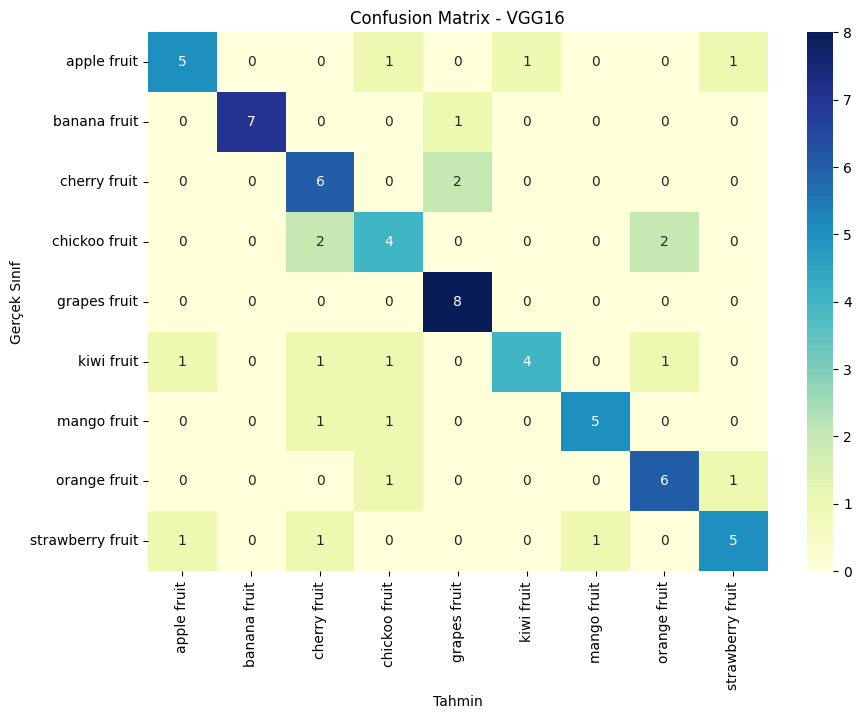


📊 VGG16 Metrikleri:
Accuracy: 0.7042
Log Loss: 1.0447
ROC AUC Score: 0.9544
Matthews Correlation Coefficient (MCC): 0.6695


In [13]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, matthews_corrcoef, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# VGG16 için değerlendirme
val_gen.reset()
y_true_vgg = val_gen.classes
class_labels_vgg = list(val_gen.class_indices.keys())

y_pred_prob_vgg = vgg_model.predict(val_gen, verbose=0)
y_pred_vgg = np.argmax(y_pred_prob_vgg, axis=1)

# Metrikler
acc_vgg = accuracy_score(y_true_vgg, y_pred_vgg)
loss_vgg = log_loss(y_true_vgg, y_pred_prob_vgg)
y_true_bin_vgg = label_binarize(y_true_vgg, classes=range(len(class_labels_vgg)))
roc_auc_vgg = roc_auc_score(y_true_bin_vgg, y_pred_prob_vgg, average='macro', multi_class='ovr')
mcc_vgg = matthews_corrcoef(y_true_vgg, y_pred_vgg)

# Rapor ve Matris
print("\n=== 📄 VGG16 Classification Report ===")
print(classification_report(y_true_vgg, y_pred_vgg, target_names=class_labels_vgg))

cm_vgg = confusion_matrix(y_true_vgg, y_pred_vgg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_vgg, annot=True, fmt='d', xticklabels=class_labels_vgg, yticklabels=class_labels_vgg, cmap="YlGnBu")
plt.title("Confusion Matrix - VGG16")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Sınıf")
plt.show()

print(f"\n📊 VGG16 Metrikleri:")
print(f"Accuracy: {acc_vgg:.4f}")
print(f"Log Loss: {loss_vgg:.4f}")
print(f"ROC AUC Score: {roc_auc_vgg:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_vgg:.4f}")


# VERİ ARTIRMA ve EFFICIENTNETB0

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1237']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.0880 - loss: 2.2863 - val_accuracy: 0.1127 - val_loss: 2.2333
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.1199 - loss: 2.2428 - val_accuracy: 0.1127 - val_loss: 2.2200
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1207 - loss: 2.2443 - val_accuracy: 0.1127 - val_loss: 2.2163
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1014 - loss: 2.2260 - val_accuracy: 0.1127 - val_loss: 2.2089
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1296 - loss: 2.2432 - val_accuracy: 0.1127 - val_loss: 2.2032
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.1378 - loss: 2.1944 - val_accuracy: 0.1127 - val_loss: 2.2097
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1082 - loss: 2.2226 - val_accuracy: 0.1127 - val_loss: 2.2118
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.0962 - loss: 2.2683 - val_accuracy: 0.1127 - val_loss: 2.2032
Epoch 9/50
9/9 ━━━━

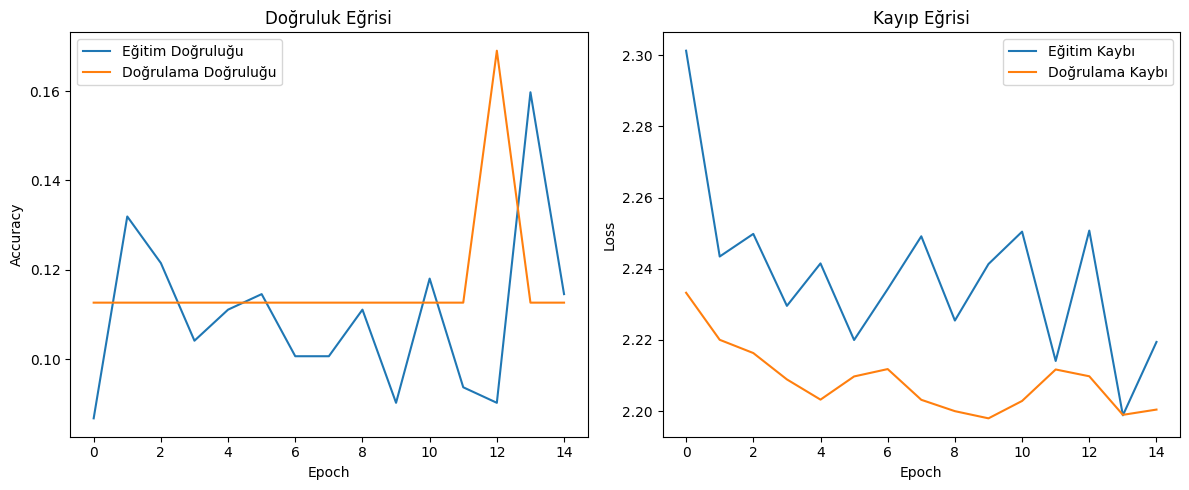

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1237']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



=== 📄 EfficientNetB0 Classification Report ===
                  precision    recall  f1-score   support

     apple fruit       0.00      0.00      0.00         8
    banana fruit       0.00      0.00      0.00         8
    cherry fruit       0.00      0.00      0.00         8
   chickoo fruit       0.00      0.00      0.00         8
    grapes fruit       0.11      1.00      0.20         8
      kiwi fruit       0.00      0.00      0.00         8
     mango fruit       0.00      0.00      0.00         7
    orange fruit       0.00      0.00      0.00         8
strawberry fruit       0.00      0.00      0.00         8

        accuracy                           0.11        71
       macro avg       0.01      0.11      0.02        71
    weighted avg       0.01      0.11      0.02        71



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


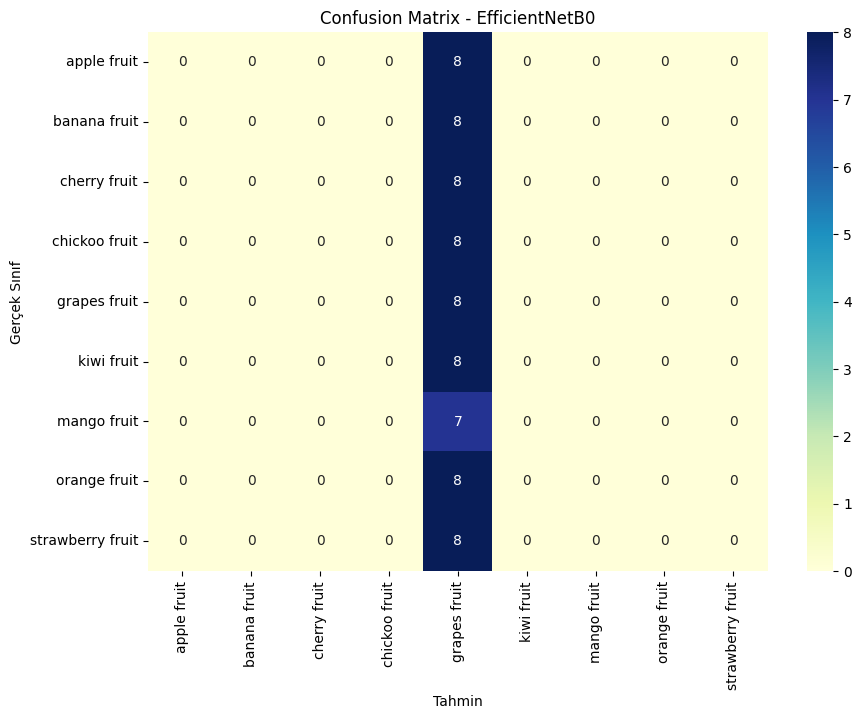


📊 EfficientNetB0 (Fine-Tuned) Metrikleri:
Accuracy: 0.1127
Log Loss: 2.1980
ROC AUC Score: 0.6150
Matthews Correlation Coefficient (MCC): 0.0000


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import label_binarize

# === 1. Veri Yükleme ve Artırma ===
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# === 2. Model Kurulumu ===
inputs = Input(shape=(224, 224, 3))
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=inputs)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

eff_model = Model(inputs=base_model.input, outputs=output)

# Son 50 katmanı eğitime aç
for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

# === 3. Derleme ve Eğitim ===
eff_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = eff_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=[early]
)

# === 4. Eğitim Grafikleri ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# === 5. Değerlendirme Metrikleri ===
val_gen.reset()
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

y_pred_prob = eff_model.predict(val_gen, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)

# Metrikler
acc = accuracy_score(y_true, y_pred)
loss = log_loss(y_true, y_pred_prob)
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
roc_auc = roc_auc_score(y_true_bin, y_pred_prob, average='macro', multi_class='ovr')
mcc = matthews_corrcoef(y_true, y_pred)

print("\n=== 📄 EfficientNetB0 Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="YlGnBu")
plt.title("Confusion Matrix - EfficientNetB0")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Sınıf")
plt.show()

# Metrik çıktısı
print("\n📊 EfficientNetB0 (Fine-Tuned) Metrikleri:")
print(f"Accuracy: {acc:.4f}")
print(f"Log Loss: {loss:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1480']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


9/9 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.1924 - loss: 2.0961 - val_accuracy: 0.1127 - val_loss: 2.2111
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5914 - loss: 1.3997 - val_accuracy: 0.1127 - val_loss: 2.2221
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8018 - loss: 0.6617 - val_accuracy: 0.1127 - val_loss: 2.2364
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7583 - loss: 0.7614 - val_accuracy: 0.1127 - val_loss: 2.2641
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8785 - loss: 0.3655 - val_accuracy: 0.1127 - val_loss: 2.2565
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8895 - loss: 0.4354 - val_accuracy: 0.1127 - val_loss: 2.2451


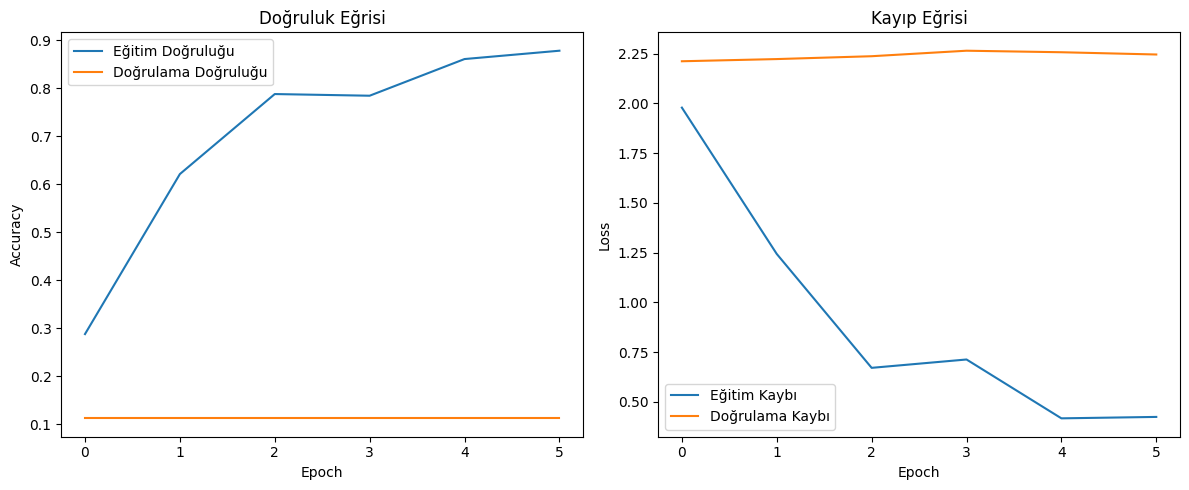

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1480']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



=== 📄 EfficientNetB0 Classification Report ===
                  precision    recall  f1-score   support

     apple fruit       0.00      0.00      0.00         8
    banana fruit       0.00      0.00      0.00         8
    cherry fruit       0.00      0.00      0.00         8
   chickoo fruit       0.11      1.00      0.20         8
    grapes fruit       0.00      0.00      0.00         8
      kiwi fruit       0.00      0.00      0.00         8
     mango fruit       0.00      0.00      0.00         7
    orange fruit       0.00      0.00      0.00         8
strawberry fruit       0.00      0.00      0.00         8

        accuracy                           0.11        71
       macro avg       0.01      0.11      0.02        71
    weighted avg       0.01      0.11      0.02        71



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


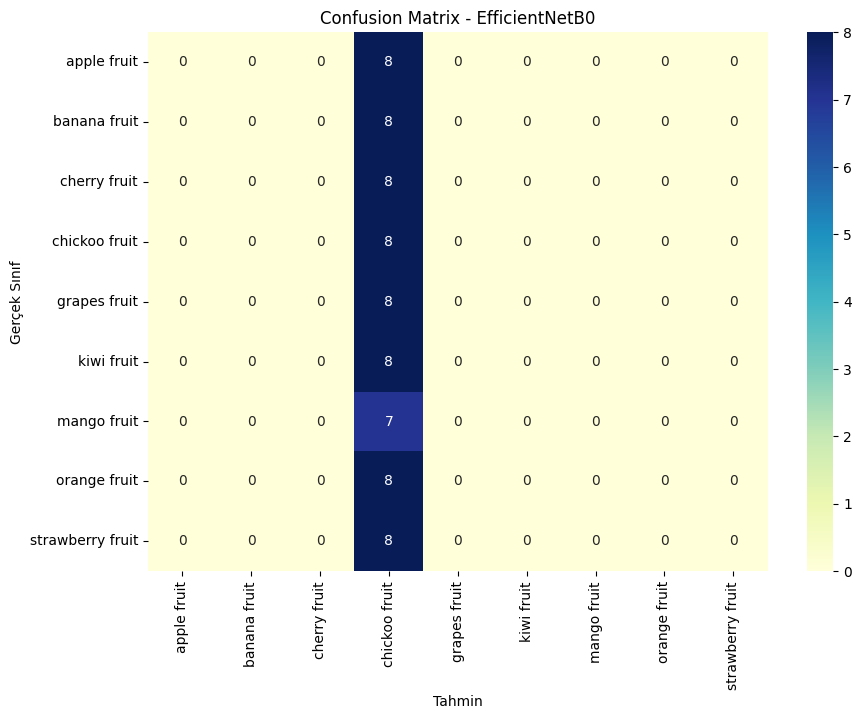


📊 EfficientNetB0 (Fine-Tuned) Metrikleri:
Accuracy: 0.1127
Log Loss: 2.2113
ROC AUC Score: 0.4685
Matthews Correlation Coefficient (MCC): 0.0000


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import label_binarize

# === 1. Veri Yükleme ve Artırma ===
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# === 2. EfficientNetB0 Modeli Kurulumu ===
inputs = Input(shape=(224, 224, 3))
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=inputs)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Katmanları dondurma (sadece son katmanları eğit)
for layer in base_model.layers[:-200]:
    layer.trainable = False
for layer in base_model.layers[-200:]:
    layer.trainable = True

# === 3. Derleme ve Eğitim ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=[early]
)

# === 4. Eğitim Grafikleri ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# === 5. Değerlendirme Metrikleri ===
val_gen.reset()
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

y_pred_prob = model.predict(val_gen, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)

# Metrikler
acc = accuracy_score(y_true, y_pred)
loss = log_loss(y_true, y_pred_prob)
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
roc_auc = roc_auc_score(y_true_bin, y_pred_prob, average='macro', multi_class='ovr')
mcc = matthews_corrcoef(y_true, y_pred)

print("\n=== 📄 EfficientNetB0 Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="YlGnBu")
plt.title("Confusion Matrix - EfficientNetB0")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Sınıf")
plt.show()

print("\n📊 EfficientNetB0 (Fine-Tuned) Metrikleri:")
print(f"Accuracy: {acc:.4f}")
print(f"Log Loss: {loss:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_1']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


9/9 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.1162 - loss: 2.2664 - val_accuracy: 0.1127 - val_loss: 2.2209
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0880 - loss: 2.2464 - val_accuracy: 0.1127 - val_loss: 2.2174
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.1426 - loss: 2.2201 - val_accuracy: 0.1127 - val_loss: 2.2153
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.1038 - loss: 2.2689 - val_accuracy: 0.1127 - val_loss: 2.2127
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1061 - loss: 2.2279 - val_accuracy: 0.1127 - val_loss: 2.2114
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.0865 - loss: 2.2218 - val_accuracy: 0.1127 - val_loss: 2.2104
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0929 - loss: 2.2378 - val_accuracy: 0.1127 - val_loss: 2.2100
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.1221 - loss: 2.2277 - val_accuracy: 0.1127 - val_loss: 2.2089
Epoch 9/50
9/9 ━━━━

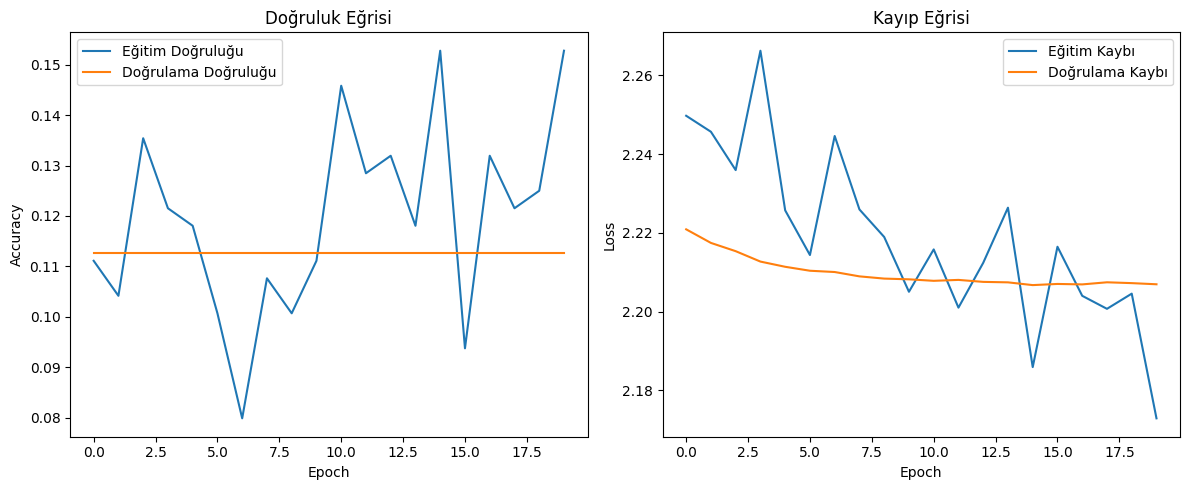

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_1']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



=== 📄 EfficientNetB0 (Fine-Tuned) Classification Report ===
                  precision    recall  f1-score   support

     apple fruit       0.00      0.00      0.00         8
    banana fruit       0.11      1.00      0.20         8
    cherry fruit       0.00      0.00      0.00         8
   chickoo fruit       0.00      0.00      0.00         8
    grapes fruit       0.00      0.00      0.00         8
      kiwi fruit       0.00      0.00      0.00         8
     mango fruit       0.00      0.00      0.00         7
    orange fruit       0.00      0.00      0.00         8
strawberry fruit       0.00      0.00      0.00         8

        accuracy                           0.11        71
       macro avg       0.01      0.11      0.02        71
    weighted avg       0.01      0.11      0.02        71



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


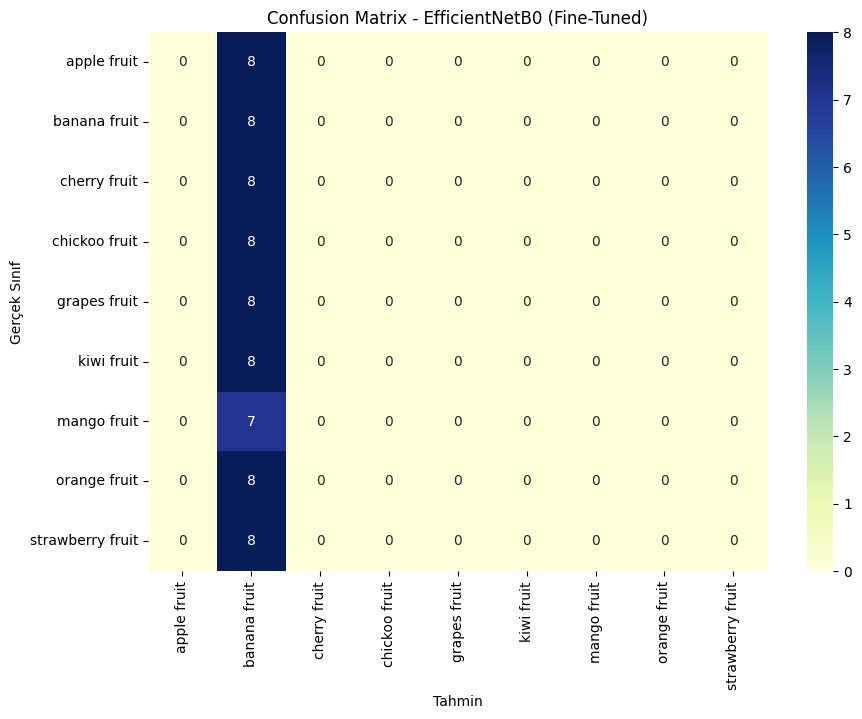


📊 EfficientNetB0 (Fine-Tuned) Metrikleri:
Accuracy: 0.1127
Log Loss: 2.2074
ROC AUC Score: 0.4319
Matthews Correlation Coefficient (MCC): 0.0000


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import label_binarize

# === 1. Veri Yükleme ve Artırma ===
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    "fruits_dataset/images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# === 2. Model Kurulumu ===
inputs = Input(shape=(224, 224, 3), name="input_1")
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=inputs)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

eff_model = Model(inputs=base_model.input, outputs=output)

# === 3. Derin Fine-Tuning ===
for layer in base_model.layers[:-100]:
    layer.trainable = False
for layer in base_model.layers[-100:]:
    layer.trainable = True

# === 4. Derleme ve Eğitim ===
optimizer = Adam(learning_rate=1e-5)
eff_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = eff_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=[early]
)

# === 5. Eğitim Eğrileri ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# === 6. Değerlendirme Metrikleri ===
val_gen.reset()
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

y_pred_prob = eff_model.predict(val_gen, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)

# Metrikler
acc = accuracy_score(y_true, y_pred)
loss = log_loss(y_true, y_pred_prob)
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
roc_auc = roc_auc_score(y_true_bin, y_pred_prob, average='macro', multi_class='ovr')
mcc = matthews_corrcoef(y_true, y_pred)

# Rapor
print("\n=== 📄 EfficientNetB0 (Fine-Tuned) Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="YlGnBu")
plt.title("Confusion Matrix - EfficientNetB0 (Fine-Tuned)")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Sınıf")
plt.show()

# Metrik çıktısı
print("\n📊 EfficientNetB0 (Fine-Tuned) Metrikleri:")
print(f"Accuracy: {acc:.4f}")
print(f"Log Loss: {loss:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
